# **Setup**

# **Dataset**

In [5]:
bfat <- read.table('BODY_FAT.txt',header = TRUE)

print(dim(bfat))
head(bfat)

[1] 252  15


,Density,SiriBF.,Over45,Weight,Height,NeckC,ChestC,AbdomenC,HipC,ThighC,KneeC,AnkleC,BicepsC,ForearmC,WristC
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0708,12.3,0,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,1.0853,6.1,0,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,1.0414,25.3,0,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,1.0751,10.4,0,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,1.0340,28.7,0,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,1.0502,20.9,0,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [13]:
# Rename Column
colnames(bfat)[2] <- 'SiriBF'

# Get Column Names
print(colnames(bfat)) 

 [1] "Density"  "SiriBF"   "Over45"   "Weight"   "Height"   "NeckC"   
 [7] "ChestC"   "AbdomenC" "HipC"     "ThighC"   "KneeC"    "AnkleC"  
[13] "BicepsC"  "ForearmC" "WristC"  


# **Graphical Analysis**
* Plot - Height Vs Body Fat

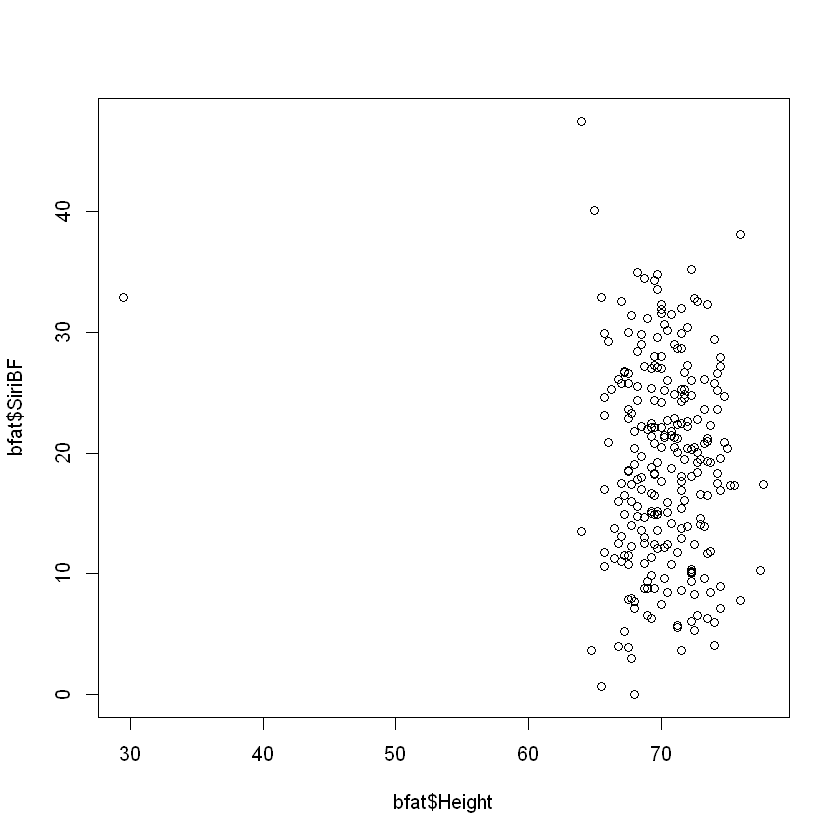

In [15]:
plot(bfat$Height,bfat$SiriBF)

# **Regression Analysis**

In [19]:
model1 = lm(bfat$SiriBF ~ bfat$Height)
model1


Call:
lm(formula = bfat$SiriBF ~ bfat$Height)

Coefficients:
(Intercept)  bfat$Height  
    33.4945      -0.2045  


In [20]:
summary(model1)


Call:
lm(formula = bfat$SiriBF ~ bfat$Height)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.5902  -6.7124   0.3966   6.0716  27.0919 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  33.4945    10.1096   3.313  0.00106 **
bfat$Height  -0.2045     0.1439  -1.421  0.15664   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.352 on 250 degrees of freedom
Multiple R-squared:  0.008009,	Adjusted R-squared:  0.004041 
F-statistic: 2.019 on 1 and 250 DF,  p-value: 0.1566


## **Plot Regression Line**

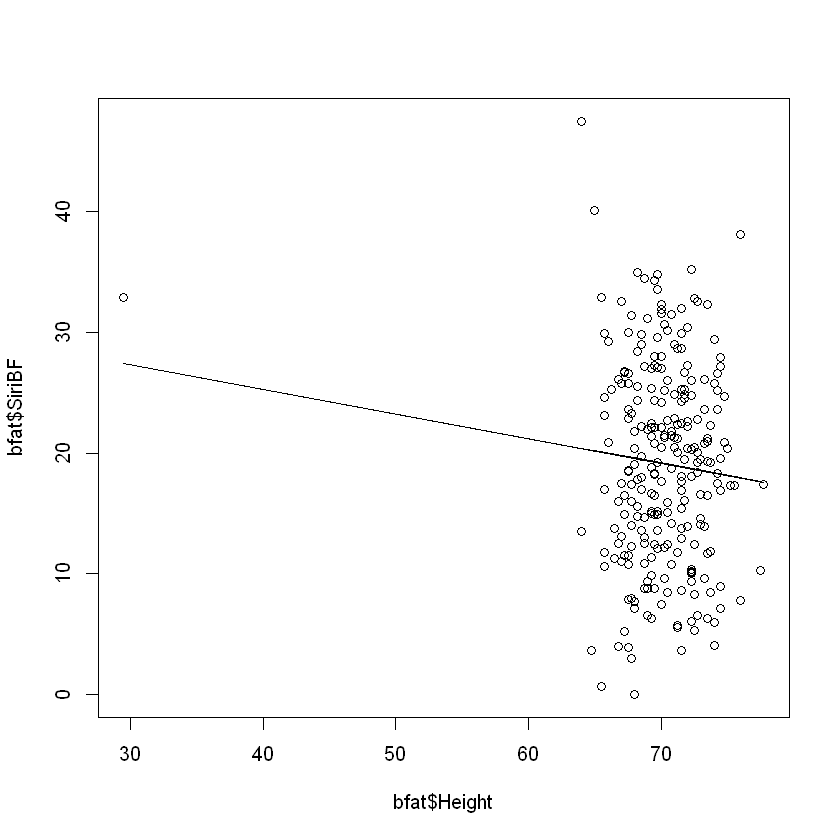

In [27]:
plot(bfat$Height,bfat$SiriBF)
lines(bfat$Height,model1$fitted.values)

## **Plot AB Line**

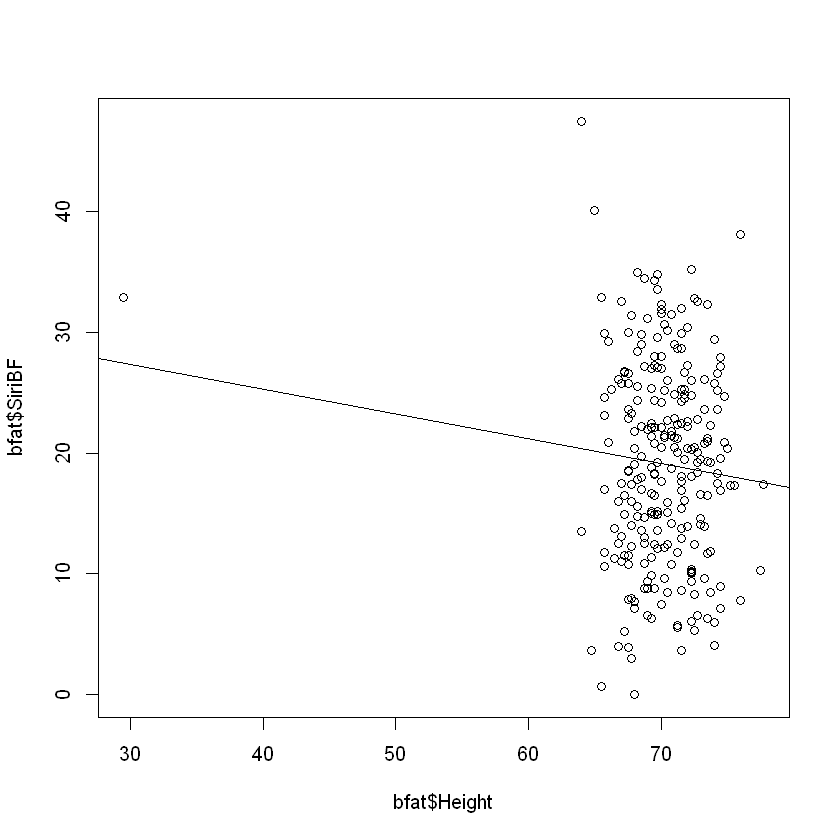

In [28]:
plot(bfat$Height,bfat$SiriBF)
abline(model1)

## **ANOVA Table**

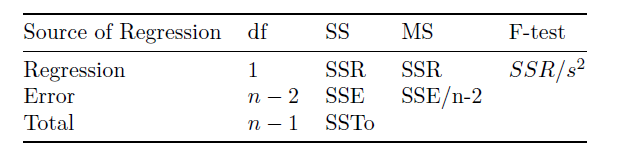

In [29]:
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
bfat$Height,1,140.7976,140.79757,2.018523,0.1566363
Residuals,250,17438.1923,69.75277,NA,NA


## **Critical Asumption Check**

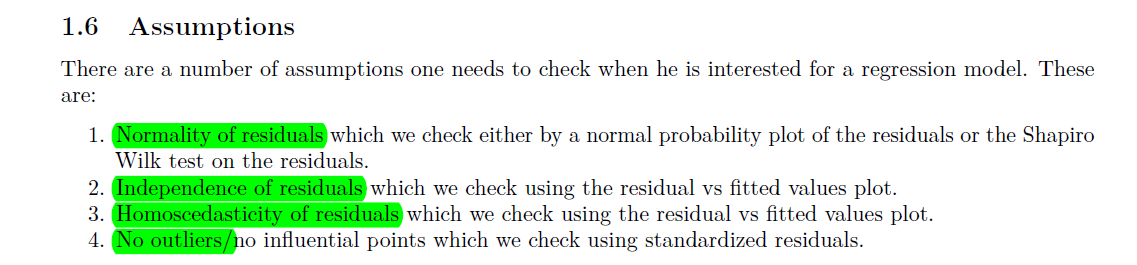

### **Normality Check**


	Shapiro-Wilk normality test

data:  model1$residuals
W = 0.99246, p-value = 0.228


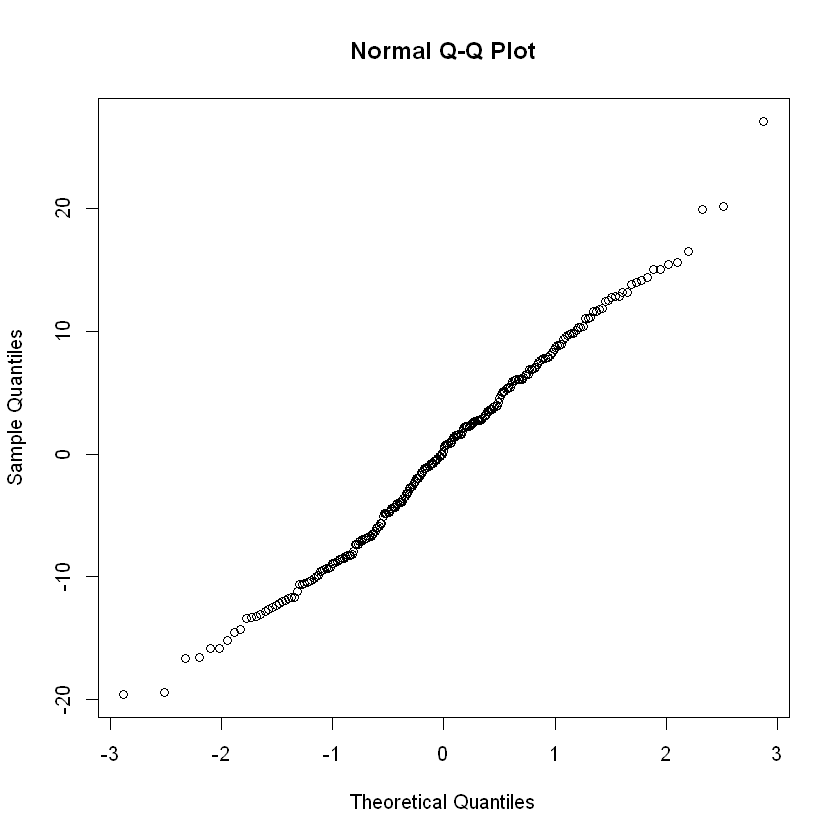

In [31]:
shapiro.test(model1$residuals)
qqnorm(model1$residuals)

### **Homo-Skedasticity**
* Of Residuals

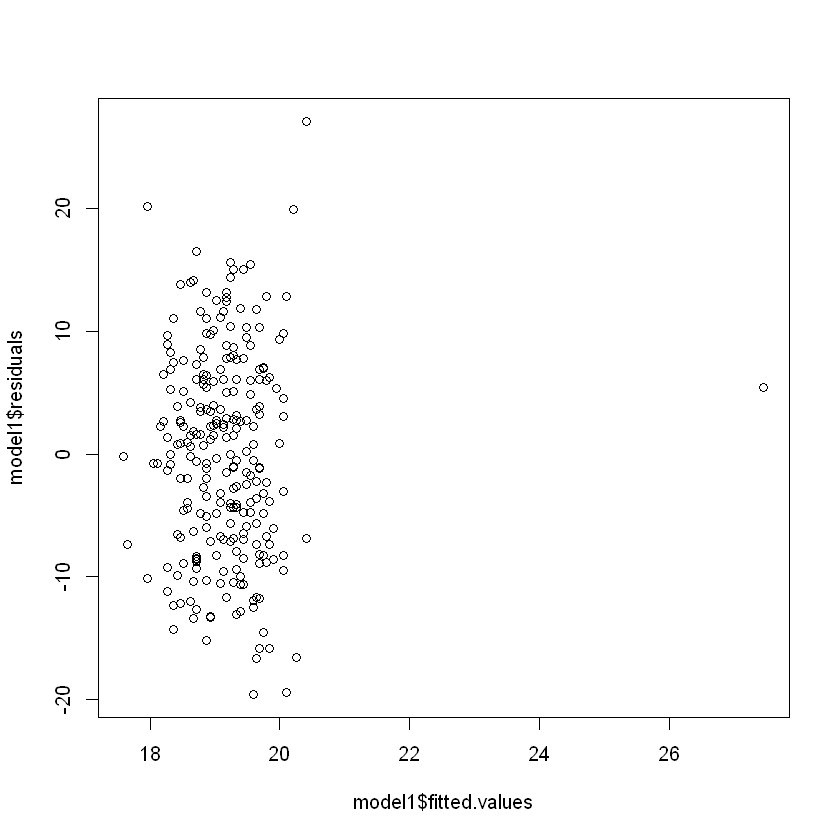

In [32]:
plot(model1$fitted.values, model1$residuals)

### **Randomness Check**

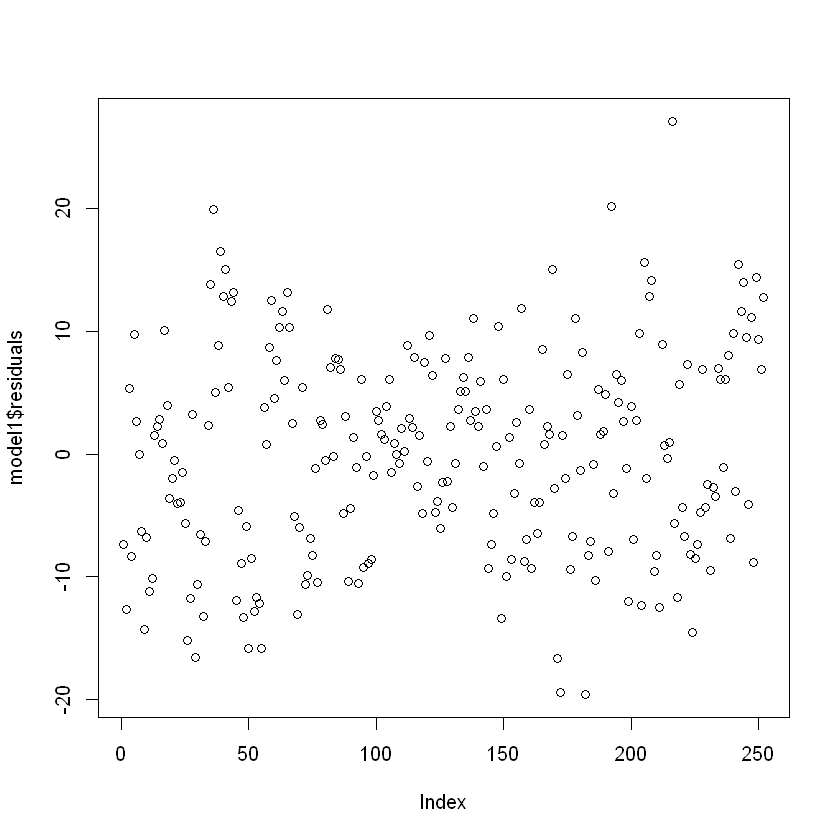

In [33]:
plot(model1$residuals)

## **Outlier Detection**

### **Standardize Residuals**


	Shapiro-Wilk normality test

data:  model1stdr
W = 0.99233, p-value = 0.2168


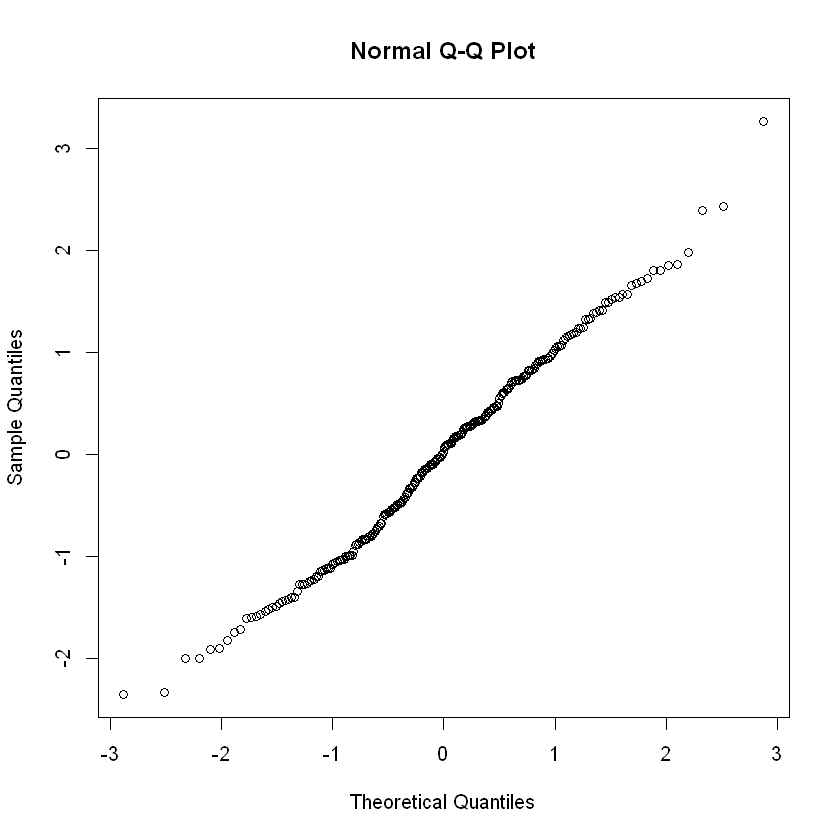

In [39]:
library(MASS)

# Standardize The Model
model1stdr=stdres(model1)

# Check Normality Using Shapiro-Wilk Test & QQ Plot
shapiro.test(model1stdr)
qqnorm(model1stdr)

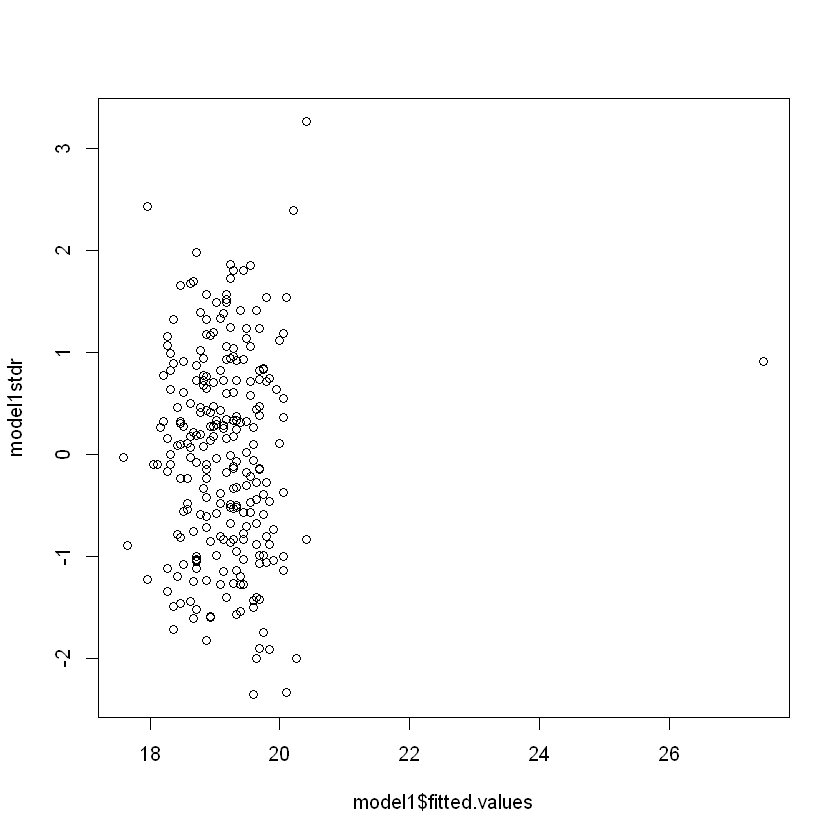

In [40]:
plot(model1$fitted.values, model1stdr)

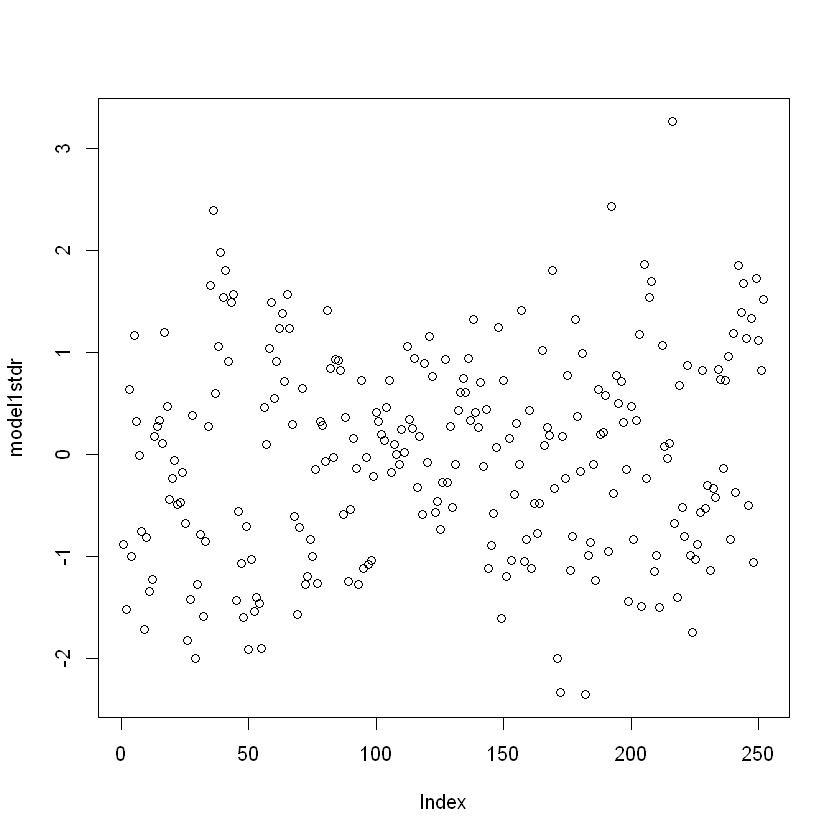

In [42]:
plot(model1stdr)
# Points Above 3 Std Deviations Are Outliers

### **Cooks Distance**

In [35]:
sort(cooks.distance(model1))

108            7          111           83          214           96 
9.738663e-09 3.034805e-08 1.554279e-06 2.078182e-06 3.166180e-06 6.104579e-06 
          80           21          147          120          213          131 
8.693302e-06 9.294973e-06 1.464250e-05 1.475633e-05 1.566846e-05 1.957055e-05 
          57          142           92          166          107          215 
2.537092e-05 2.861231e-05 3.472685e-05 3.513619e-05 3.698955e-05 4.026864e-05 
         185          103          198           91          236          109 
4.315248e-05 4.316283e-05 4.500523e-05 4.994939e-05 5.240004e-05 5.247723e-05 
          16          156           76           24           13          173 
5.379327e-05 5.599863e-05 6.243261e-05 6.301247e-05 6.803751e-05 7.016558e-05 
         106          117          168          102          188           99 
7.651677e-05 9.512514e-05 9.533735e-05 9.564368e-05 9.564368e-05 1.103465e-04 
         152          174          110          180          114          189 
1.256387e-04 1.271946e-04 1.297717e-04 1.298330e-04 1.351062e-04 1.361857e-04 
          79           14           34          206           67          167 
1.611595e-04 1.618905e-04 1.632198e-04 1.794339e-04 1.800071e-04 1.889156e-04 
          20          128          116          230          197          137 
2.052383e-04 2.067613e-04 2.111469e-04 2.139276e-04 2.154857e-04 2.263467e-04 
         170          202           15          113          232           78 
2.291975e-04 2.326405e-04 2.346780e-04 2.446745e-04 2.538451e-04 2.542081e-04 
         129          126          193          179          155          139 
2.585474e-04 2.645470e-04 2.924557e-04 3.048076e-04 3.412333e-04 3.777903e-04 
         132          233          101          140          100          160 
3.794411e-04 3.938559e-04 3.972136e-04 4.032768e-04 4.241359e-04 4.288292e-04 
          28          164           18           22          154          246 
4.517708e-04 4.581712e-04 4.654493e-04 4.717975e-04 4.937977e-04 5.200259e-04 
          56            6          130           19          143           23 
5.289010e-04 5.430184e-04 5.446110e-04 5.457371e-04 5.509706e-04 5.661305e-04 
         229          220           88          241          200          146 
5.684263e-04 5.715526e-04 6.604236e-04 6.606329e-04 6.704685e-04 6.865238e-04 
          37          162          123          195          135          124 
7.234067e-04 7.295301e-04 7.383898e-04 7.580766e-04 7.744495e-04 7.961139e-04 
         227           68          118          104          190          217 
8.194379e-04 8.401146e-04 8.569488e-04 8.596118e-04 8.621336e-04 9.204900e-04 
          90           71           46          150          141           87 
9.249777e-04 9.603482e-04 1.056974e-03 1.057206e-03 1.060963e-03 1.101127e-03 
         219          105           70           49           94          133 
1.102878e-03 1.119140e-03 1.164541e-03 1.198160e-03 1.263782e-03 1.281447e-03 
         221          196           25          122          163          201 
1.290935e-03 1.296473e-03 1.309874e-03 1.346987e-03 1.363499e-03 1.378086e-03 
         251          239          237          175           60          184 
1.386191e-03 1.401696e-03 1.413270e-03 1.435637e-03 1.469834e-03 1.476065e-03 
         159           33            8          235           84            3 
1.583555e-03 1.589075e-03 1.598765e-03 1.637948e-03 1.755756e-03 1.771514e-03 
          85          136           64          187          238          191 
1.787453e-03 1.796108e-03 1.811957e-03 1.829061e-03 1.901141e-03 1.915183e-03 
         127          210          222           86          134          115 
1.983319e-03 1.993975e-03 2.026319e-03 2.095142e-03 2.105512e-03 2.123381e-03 
         125            1          112           58          177          234 
2.144657e-03 2.218286e-03 2.233589e-03 2.247649e-03 2.251782e-03 2.271389e-03 
          82          225           31           10        

## **Plotting A Regression Model**

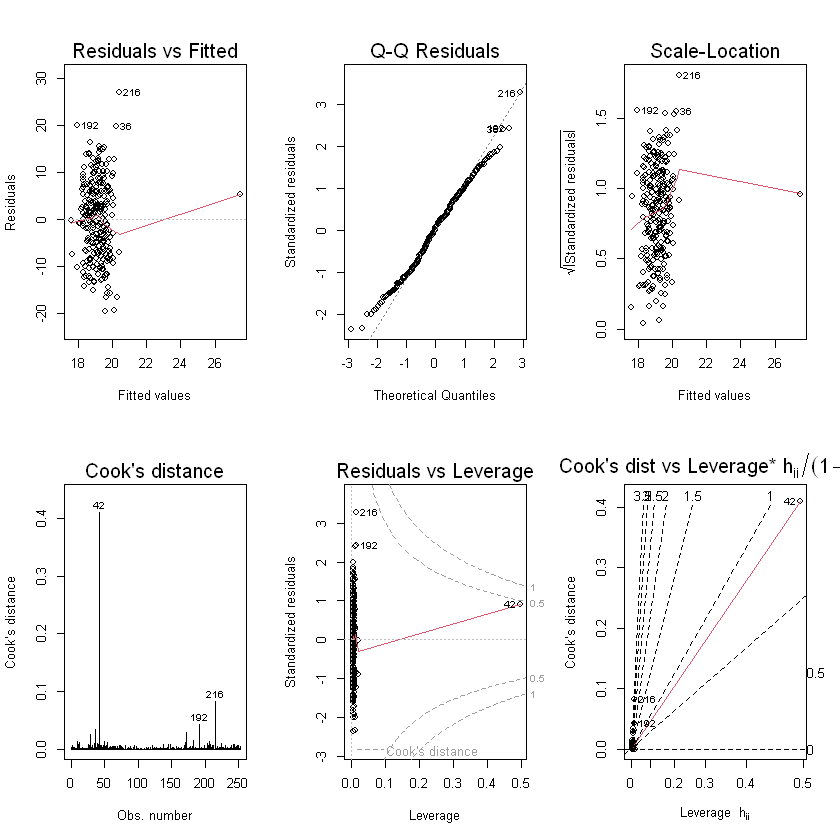

In [34]:
par(mfrow=c(2, 3))
plot(model1, which=1:6)